# Sample program for maximum entropy inverse reinforcement learning. 
This notebook implements maximum entropy inverse reinforcement learning (Ziebart et al., 2008; Wulfmeier et al., 2017). The algorithms are evaluated on the deterministic [FrozenLake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) provided by the [Gymnasium](https://gymnasium.farama.org/). There are 8x8 possible states and 4 discrete deterministic actions.The codes of this notebook are based on the following pages:
* https://github.com/yasufumy/python_irl
* https://github.com/yrlu/irl-imitation
* https://github.com/harpribot/IRL-maxent

References
* B. D. Ziebart, A. Maas, J. Andrew Bagnell, and A. K. Dey. (2008). [Maximum Entropy Inverse Reinforcement Learning](https://www.aaai.org/Library/AAAI/2008/aaai08-227.php). In Proc. of AAAI. 
* M. Wulfmeier, D. Rao, D. ZengWang, P. Ondruska,
and I. Posner. (2017). [Large-scale cost function learning for path planning using deep inverse
reinforcement learning](https://doi.org/10.1177/0278364917722396). Internationa Journal of Robotics Research, 36(10): 1073-1087.


In [114]:
import numpy as np
import matplotlib.pyplot as plt
!pip install gymnasium
import gymnasium as gym
import random
from itertools import product
# %matplotlib inline

env = gym.make('FrozenLake-v1', render_mode='ansi', desc=None, map_name='8x8', is_slippery=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Value iteration
Applying the Bellman optimality operator to find the optimal state-action value function. 
$$V(s) \leftarrow \max_a Q(s, a), \quad Q(s, a) = r(s) + \gamma \sum_{s'} p_T (s' \mid s, a) V(s').$$
compute_action_value(state) represents the action value at state "state." For simplicity, the optimal policy is approximated by setting $\beta$ to a large value.
$$\pi (a \mid s) = \frac{\exp (\beta Q(s, a))} {\sum_{a'} \exp (\beta Q(s, a'))}.$$


In [112]:
class ValueIteration:
    def __init__(self, env):
        self.env = env

    
    def __call__(self, gamma=0.9, beta=500, reward_function=None):
        n_states = env.observation_space.n
        n_actions = env.action_space.n
        V = np.random.rand(n_states)
        epslion = 1e-5

        def compute_action_value(state):
            qA = np.zeros(n_actions)
            for action in range(n_actions):
                for prob, next_state, reward, done in self.env.P[state][action]:
                    if reward_function is not None:
                        reward = reward_function[state]
                    qA[action] += prob * (reward + gamma * V[next_state])
            return qA


        def compute_softmax_policy(beta):
            policy = np.zeros([n_states, n_actions])
            for state in range(n_states):
                policy[state] = beta*compute_action_value(state)
            policy -= policy.max(axis=1, keepdims=True)
            policy = np.exp(policy) / np.exp(policy).sum(axis=1, keepdims=True)

            return policy

        V_error = list([])

        while True:
            delta = 0
            for state in range(n_states):
                qA = compute_action_value(state)
                max_q = qA.max()
                delta = max(delta, np.abs(max_q - V[state]))
                V[state] = max_q
            V_error.append(delta)
            if delta < epslion:
                break

        policy = compute_softmax_policy(beta)

        return V, policy, V_error


def visualize_V(V, V_error):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    im1 = axs[0].pcolor(V.reshape(8, 8)[::-1, :])
    axs[0].set_title('state-value function, V')
    axs[0].set_aspect(1.0/axs[0].get_data_ratio(), adjustable='box')
    fig.colorbar(im1, ax=axs[0])
    axs[1].plot(V_error)
    axs[1].set_xlabel('total number of iterations')
    axs[1].set_ylabel('error')
    axs[1].set_title('convergence')

## Calculate the state value and retrieve the policy

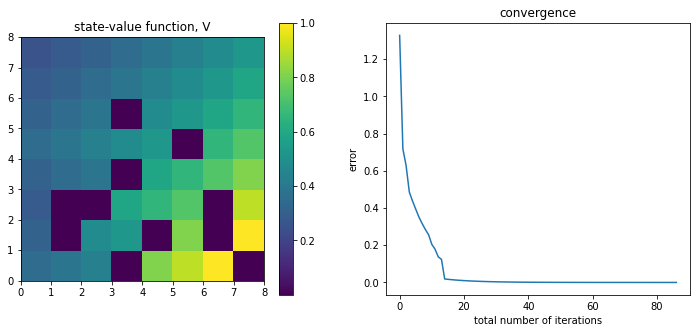

In [115]:
# np.random.seed(seed=0)
value_iteration = ValueIteration(env)
V, policy, V_error = value_iteration(gamma=0.9, beta=500)
visualize_V(V, V_error)

## Show the optimal behavior

In [117]:
state, info = env.reset()
done = False
total_rewards = 0
total_steps = 0
while not done:
    print(env.render())
    action = np.random.multinomial(1, policy[state]).argmax()
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_rewards += reward
    total_steps = total_steps + 1
print(env.render())
print('total rewards: %f, total_steps: %d' % (total_rewards, total_steps))


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
F

## Collect the expert data by running the optimal policy
The expert policy is given by the optimal policy trained with the original reward function. Then, generate a set of state-action sequences to collect the expert data $\mathcal{D}^E = \{ \tau_k \}_{k=1}^{N^E}$, $\tau_k = (s_0^k, s_1^k, \ldots, s_T^k)$.

In [118]:
def sample_trajectories(env, policy, n_steps=20, n_trajectories=100, initial_states=None):
  if initial_states is None:
    states = np.random.choice(np.arange(0, env.observation_space.n), n_trajectories)
  else:
    states = initial_states

  trajectories = []
  for state in states:
    env.reset()
    env.s = state
    done = False
    trajectory = []
    for i in range(n_steps):
      action = np.random.multinomial(1, policy[state]).argmax()
      trajectory.append(state)
      state, reward, terminated, truncated, info = env.step(action)
      done = truncated or terminated 
      if done:
        trajectory.extend([state] * (n_steps - len(trajectory)))
        break

      trajectories.append(trajectory)

  return np.array(trajectories)

trajectories = sample_trajectories(env, policy)
print(trajectories)

[[ 2  8 16 ... 63 63 63]
 [ 2  8 16 ... 63 63 63]
 [ 2  8 16 ... 63 63 63]
 ...
 [22  8  9 ... 63 63 63]
 [22  8  9 ... 63 63 63]
 [22  8  9 ... 63 63 63]]


## Compute the expected feature count

In [119]:
def compute_feature(n_features, trajectories):
  n_trajectories, n_steps = trajectories.shape
  phi = np.zeros(n_features)
  traj_flatten = trajectories.ravel()
  for state in traj_flatten:
      phi[state] += 1
  phi /= n_trajectories

  return phi

experts_feature = compute_feature(env.observation_space.n, trajectories)
#experts_feature = np.load('experts_feature.npy')
print(experts_feature.reshape(4, -1))

[[0.19984802 0.48784195 0.3381459  0.17933131 0.10942249 0.02963526
  0.01975684 0.00987842 0.55167173 0.46048632 0.42857143 0.24848024
  0.30851064 0.17857143 0.08890578 0.03951368]
 [0.27051672 0.34194529 0.43009119 0.         0.14969605 0.14969605
  0.19908815 0.13981763 0.10942249 0.28115502 0.7112462  0.7112462
  0.80091185 0.00987842 0.09878419 0.16945289]
 [0.03115502 0.         0.03191489 0.0106383  0.80091185 0.43009119
  0.21884498 0.39817629 0.06155015 0.0106383  0.0106383  0.
  0.40045593 0.62158055 0.         0.39817629]
 [0.01975684 0.02051672 0.01975684 0.         0.01975684 0.67097264
  0.0106383  0.37841945 0.01975684 0.00987842 0.0106383  0.0106383
  0.01975684 0.63145897 0.63145897 5.85030395]]


# Maximum entropy inverse reinforcement learning
The probability to generate the state sequence $\tau$ is given by
$$p(\tau \mid w) = \frac{1}{Z(w)} \exp \left( R(\tau; w) \right), \quad Z(w) = \sum_{\tau'} \exp \left( R(\tau'; w) \right), $$
where $R(\tau; w)$ is the total return:
$$R(\tau; w) = \sum_{t=0}^T \gamma^t r(s_t; w), $$
$w$ is the parameter of the reward function, and $\gamma$ is the discount factor. For the given expert data, the log likelihood is calculated by
$$\mathcal{L}(w) = \frac{1}{N^E} \sum_{k=1}^{N^E} \ln p(\tau_k; w).$$
Then, its gradient is given by
$$\nabla_w \mathcal{L}(w) = \frac{1}{N^E} \sum_{k=1}^{N^E} \nabla_w R(\tau_k; w) - \sum_{\tau} p(\tau \mid w) \nabla_w R(\tau; w).$$
The reward parameter is updated by the stochastic gradient ascent. 

In [120]:
def compute_visitation(env, policy, trajectories):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    probs = env.P
    n_trajectories, n_steps = trajectories.shape

    mu = np.zeros((n_steps, n_states))
    for trajectory in trajectories:
        mu[0, trajectory[0]] += 1
    mu /= n_trajectories

    states = range(n_states)
    actions = range(n_actions)
    for t in range(1, n_steps):
        for state, action in product(states, actions):
          for prob, next_state, _, _ in probs[state][action]:
              mu[t][next_state] += mu[t-1][state] * policy[state][action] * prob

    return mu.sum(axis=0)


class MaxEntIRL:
    def __init__(self, env, experts_feature, trajectories):
        self.env = env
        self.experts_feature = experts_feature
        self.trajectories = trajectories

    def __call__(self, policy, n_epochs, gamma=0.9, beta=500):
        value_iteration = ValueIteration(self.env)
        reward_function = np.zeros(self.env.observation_space.n)
        learning_rate = 0.1

        for i in range(n_epochs):
            V, policy, V_error = value_iteration(gamma, beta, reward_function=reward_function)
            learners_feature = compute_visitation(self.env, policy, self.trajectories)
            grad = self.experts_feature - learners_feature
            reward_function += learning_rate * grad

        return reward_function, V

In [121]:
maxent_irl = MaxEntIRL(env, experts_feature, trajectories)
reward_function, V = maxent_irl(policy, n_epochs=50, gamma=0.9)
# print(reward_function.reshape(8, 8)[::1, :])
# print(V.reshape(8, 8)[::1, :])

## Show results.

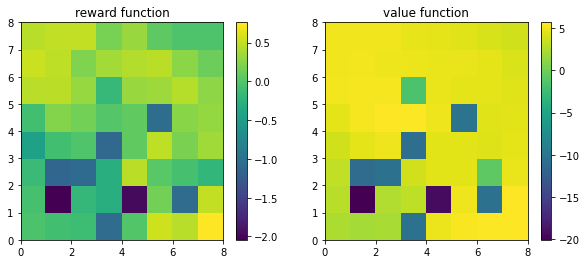

In [122]:
def plot_results(reward_function, V):
  fig, axs = plt.subplots(1, 2, figsize=(10, 4))
  im1 = axs[0].pcolor(reward_function.reshape(8, 8)[::-1, :])
  axs[0].set_title('reward function')
  fig.colorbar(im1, ax=axs[0])
  im2 = axs[1].pcolor(V.reshape(8, 8)[::-1, :])
  axs[1].set_title('value function')
  fig.colorbar(im2, ax=axs[1])
  plt.show()

plot_results(reward_function, V)

# Modified maximum inverse reinforcement learning

The second term of the gradient of the log likelihood is approximated using samples generated by the learner's policy:
$$\nabla_w \mathcal{L}(w) = \frac{1}{N^E} \sum_{k=1}^{N^E} \nabla_w R(\tau_k; w) - \frac{1}{N^L} \sum_{j=1}^{N^L} \nabla_w R(\tau_j; w)$$

In [123]:
class MaxEntIRLSample:
  def __init__(self, env, experts_feature, trajectories):
    self.env = env
    self.experts_feature = experts_feature
    self.n_trajectories, self.n_steps = trajectories.shape
    self.initial_states = trajectories[:, 0]

  def __call__(self, policy, n_epochs, gamma=0.9, beta=500, epsilon=1e-5):
    value_iteration = ValueIteration(self.env)
    reward_function = np.zeros(self.env.observation_space.n)
    learning_rate = 0.1

    for i in range(n_epochs):
      V, policy, V_error = value_iteration(gamma, beta, reward_function)
      trajectories = sample_trajectories(self.env, policy, self.n_steps,
                                         self.n_trajectories,
                                         self.initial_states)
      learners_feature = compute_feature(self.env.observation_space.n, trajectories)
      grad = self.experts_feature - learners_feature
      reward_function += learning_rate * grad

    return reward_function, V

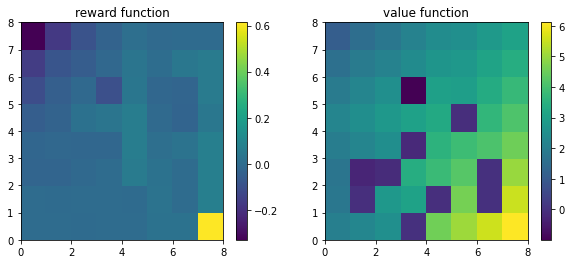

In [124]:
maxent_irl_sample = MaxEntIRLSample(env, experts_feature, trajectories)
reward_function, V = maxent_irl_sample(policy, n_epochs=50, gamma=0.9)
# print(reward_function.reshape(4, 4)[::1, :])
# print(V.reshape(4, 4)[::1, :])
plot_results(reward_function, V)